In [1]:
import numpy as np

x=np.array([[1,2],[3,4],[5,3],[3,5],[7,3],[6,1],[5,1],[4,9],[3,4],[6,3]])
x

array([[1, 2],
       [3, 4],
       [5, 3],
       [3, 5],
       [7, 3],
       [6, 1],
       [5, 1],
       [4, 9],
       [3, 4],
       [6, 3]])

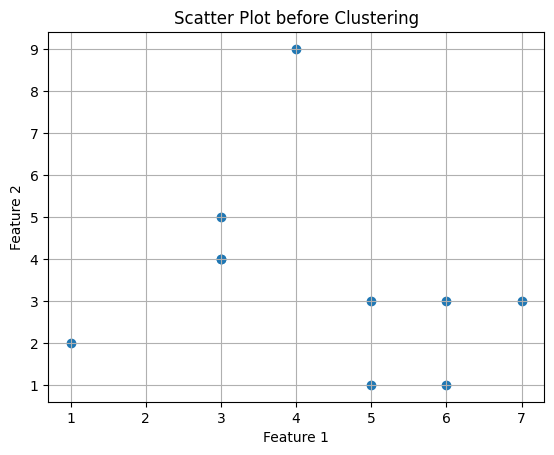

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot before Clustering")
plt.grid(True)
plt.show()

In [3]:
#K-Means Clustering
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
#model=kmeans.fit(x)
#labels=kmeans.fit_predict(x)
labels=kmeans.fit_predict(x)
print(labels)
print(kmeans.cluster_centers_)

[2 0 1 0 1 1 1 0 0 1]
[[3.25 5.5 ]
 [5.8  2.2 ]
 [1.   2.  ]]


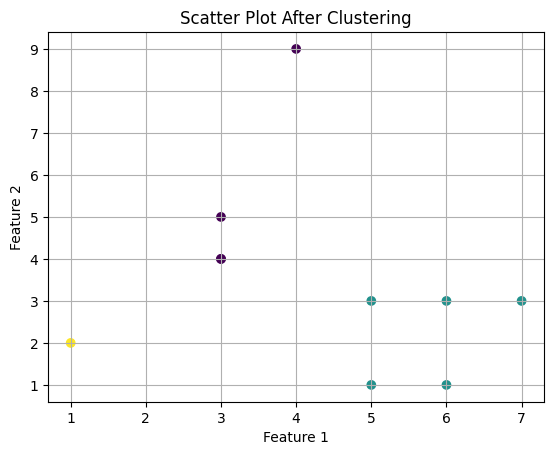

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot After Clustering")
plt.grid(True)
plt.show()

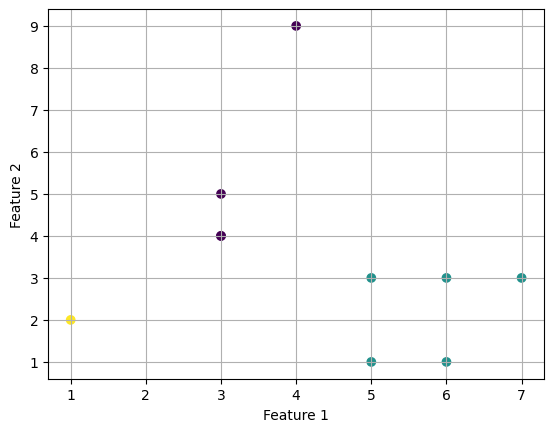

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("")
plt.grid(True)
plt.show()

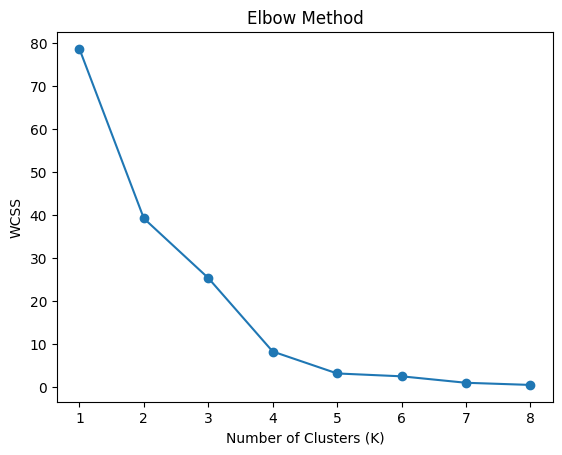

In [6]:
'''
Elbow method : 
    Plot K vs WCSS(within class square sum error)
    Elbow point gives optimal K
'''
#Elbow Method for optimal K
from sklearn.cluster import KMeans
import numpy as np

X=np.array([[1,2],[3,4],[5,3],[3,5],[7,3],[6,1],[5,1],[4,9],[3,4],[6,3]])
wcss=[]
for k in range(1,9):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,9),wcss,marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [7]:
#K-Medoid code

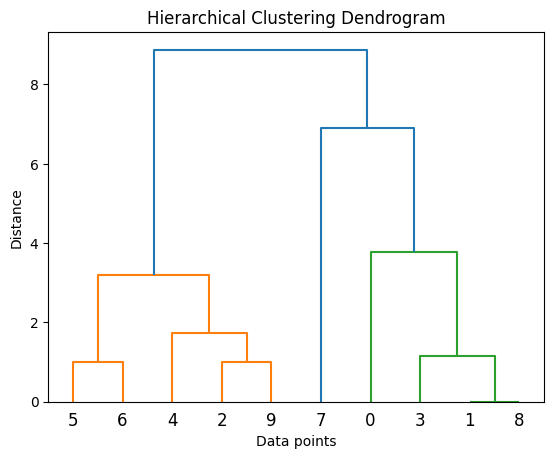

linkage matrix : 
 [[ 1.          8.          0.          2.        ]
 [ 2.          9.          1.          2.        ]
 [ 5.          6.          1.          2.        ]
 [ 3.         10.          1.15470054  3.        ]
 [ 4.         11.          1.73205081  3.        ]
 [12.         14.          3.19374388  5.        ]
 [ 0.         13.          3.76386326  4.        ]
 [ 7.         16.          6.90651866  5.        ]
 [15.         17.          8.87693641 10.        ]]

Detailed Linkage Matrix:

Step | index of Cluster i | index of Cluster j | Distance/variance| Points in New Cluster after merging
-----------------------------------------------------------------
   1 |         1 |         8 |   0.0000 |                      2
   2 |         2 |         9 |   1.0000 |                      2
   3 |         5 |         6 |   1.0000 |                      2
   4 |         3 |        10 |   1.1547 |                      3
   5 |         4 |        11 |   1.7321 |                      3

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np                                        
import matplotlib.pyplot as plt                           

# Create dataset (10 data points with 2 features each)
x = np.array([
    [1,2],
    [3,4],
    [5,3],
    [3,5],
    [7,3],
    [6,1],
    [5,1],
    [4,9],
    [3,4],
    [6,3]
])

# Perform hierarchical clustering using Ward method
# Ward method merges clusters by minimizing within-cluster variance
Z = linkage(x, method='ward')

'''
ward method : Agglomerative clustering merges based on minimum total within-cluster variance
single method : Merges clusters based on minimum distance between two nearest points
complete method : Merges clusters based on maximum distance between two farthest points
'''

# Draw dendrogram (tree diagram showing cluster merging)
dendrogram(Z)

# Add title and axis labels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")

# Show the plot
plt.show()

# Print the linkage matrix
# It shows which clusters merged, at what distance, and number of points in new cluster
print('linkage matrix : \n',Z)
print("\nDetailed Linkage Matrix:\n")
print("Step | index of Cluster i | index of Cluster j | Distance/variance| Points in New Cluster after merging")
print("-----------------------------------------------------------------")

for i, row in enumerate(Z):
    c1 = int(row[0])
    c2 = int(row[1])
    dist = row[2]
    points = int(row[3])
    
    print(f"{i+1:>4} | {c1:>9} | {c2:>9} | {dist:>8.4f} | {points:>22}")


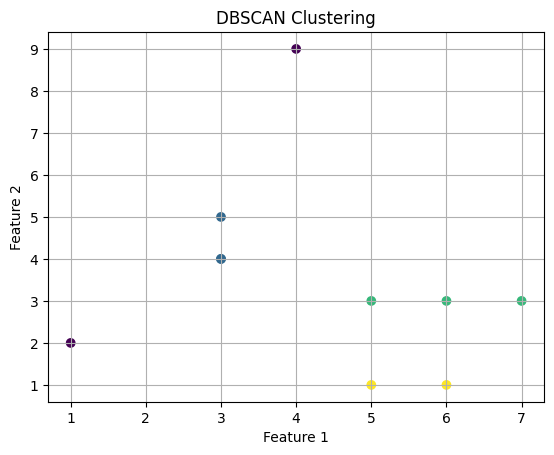

In [9]:
#Density Based Clustering (DBSCAN)
from sklearn.cluster import DBSCAN
import numpy as np                                        
import matplotlib.pyplot as plt                           
X = np.array([
    [1,2],
    [3,4],
    [5,3],
    [3,5],
    [7,3],
    [6,1],
    [5,1],
    [4,9],
    [3,4],
    [6,3]
])
dbscan=DBSCAN(eps=1.5,min_samples=2)
db_labels=dbscan.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=db_labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.show()

Cluster Labels:
[-1  0  1  0  1  2  2 -1  0  1]


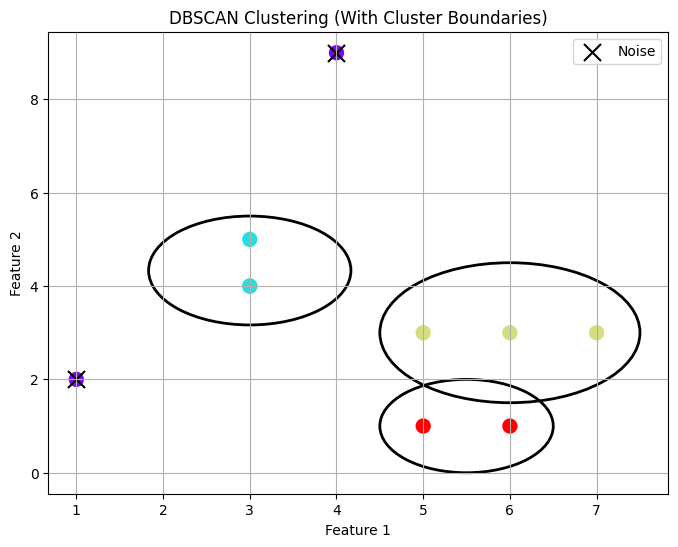

In [10]:
# Density Based Clustering (DBSCAN) - v2

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# ----------------------------------------
# Step 1: Create Dataset
# ----------------------------------------
# 10 data points with 2 features
X = np.array([
    [1,2],
    [3,4],
    [5,3],
    [3,5],
    [7,3],
    [6,1],
    [5,1],
    [4,9],
    [3,4],
    [6,3]
])

# ----------------------------------------
# Step 2: Create DBSCAN Model
# ----------------------------------------
# eps = maximum distance between neighbors
# min_samples = minimum points required to form a dense region
dbscan = DBSCAN(eps=1.5, min_samples=2)

# ----------------------------------------
# Step 3: Fit model and predict cluster labels
# ----------------------------------------
db_labels = dbscan.fit_predict(X)

# ----------------------------------------
# Step 4: Print cluster labels
# ----------------------------------------
print("Cluster Labels:")
print(db_labels)

# Note:
# -1 → Noise (outlier)
#  0,1,2,... → Cluster numbers

# ----------------------------------------
# Step 5: Plot clusters
# ----------------------------------------
plt.figure(figsize=(8,6))

# Scatter plot colored by cluster labels
scatter = plt.scatter(X[:,0], X[:,1], c=db_labels, cmap='rainbow', s=100)

# ----------------------------------------
# Step 6: Circle each cluster
# ----------------------------------------
unique_labels = set(db_labels)

for label in unique_labels:
    
    # Ignore noise points (-1)
    if label == -1:
        continue
    
    # Get points belonging to this cluster
    cluster_points = X[db_labels == label]
    
    # Compute cluster center (mean of cluster points)
    center = cluster_points.mean(axis=0)
    
    # Compute radius (max distance from center)
    radius = np.max(np.linalg.norm(cluster_points - center, axis=1))
    
    # Draw circle around cluster
    circle = Circle(center, radius + 0.5, 
                    fill=False, edgecolor='black', linewidth=2)
    plt.gca().add_patch(circle)

# ----------------------------------------
# Step 7: Highlight noise points
# ----------------------------------------
noise = X[db_labels == -1]
if len(noise) > 0:
    plt.scatter(noise[:,0], noise[:,1], 
                color='black', marker='x', s=150, label='Noise')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering (With Cluster Boundaries)")
plt.grid(True)
plt.legend()
plt.show()
